In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,precision_score,accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
test_df  =  pd.read_csv('test.csv')

In [40]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Question 1.
def plot_image(dataFrame,index):
    row =  dataFrame.iloc[index]
    row =  row[1:]
    output=[]
    for i in row:
        if i > 0:
            value = round(i/256)
            output.append(value)
        else:
            output.append(i)
    output = np.array(output).reshape(28,28)
    plt.gray()
    return plt.imshow(output)

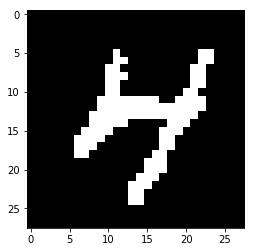

In [6]:
plot_image(train_df,32)

   # Logestic Regression Start...

NameError: name 'accuracy_score' is not defined

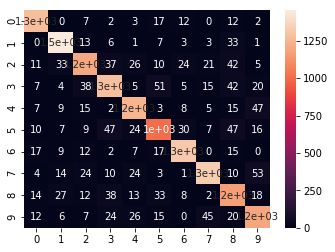

In [12]:
#Data prep
df = train_df
X=df[df.columns[1:]]
y= df[df.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Data preprocessing--
scaler = MinMaxScaler()
X_trained_sclaed = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# model 
Lr = LogisticRegression()
Lr.fit(X_trained_sclaed,y_train)
pred=Lr.predict(X_test_scaled)
confusion_matrix = confusion_matrix(y_test,pred)
dat_framecm = pd.DataFrame(confusion_matrix)

             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1333
          1       0.93      0.96      0.94      1520
          2       0.90      0.85      0.87      1414
          3       0.88      0.87      0.88      1471
          4       0.91      0.92      0.91      1358
          5       0.87      0.84      0.85      1205
          6       0.94      0.94      0.94      1397
          7       0.93      0.90      0.92      1480
          8       0.83      0.88      0.85      1334
          9       0.88      0.89      0.88      1348

avg / total       0.90      0.90      0.90     13860



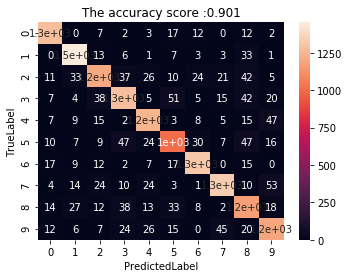

In [24]:
plt.figure(figsize=(5.5,4))
sns.heatmap(dat_framecm,annot=True)
plt.title('The accuracy score :{0:.3f}'.format(accuracy_score(y_test,pred)))
plt.ylabel('TrueLabel')
plt.xlabel('PredictedLabel')
print(classification_report(y_test,pred))

Text(0.5,1,'Priopr probab count')

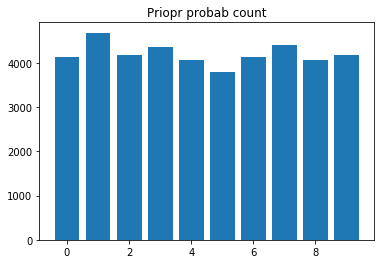

In [57]:
unique,count = np.unique(y,return_counts=True)
a=dict(zip(unique,count))
plt.bar(a.keys(),a.values())
plt.title('Priopr probab count')



# Nural Network


Text(0.5,1,'The accuracy score :0.938')

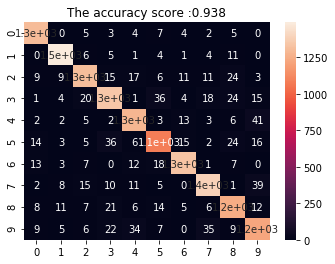

In [7]:
df = train_df
X=df[df.columns[1:]]
y= df[df.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = MLPClassifier(solver='lbfgs', activation='logistic',alpha=1e-5,hidden_layer_sizes=(100,), random_state=1)
clf.fit(X_train,y_train)
pred_ = clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test,pred_)
dat_framecm = pd.DataFrame(confusion_matrix)
plt.figure(figsize=(5.5,4))
sns.heatmap(dat_framecm,annot=True)
plt.title('The accuracy score :{0:.3f}'.format(accuracy_score(y_test,pred_)))
#plt.ylabel('TrueLabel')
#plt.xlabel('PredictedLabel')
#print(classification_report(y_test,pred_))


[(6, 5, 5), (9, 3, 20), (8, 6, 64), (9, 7, 77), (3, 9, 98), (8, 4, 119), (7, 4, 139), (9, 5, 163), (5, 9, 164), (7, 9, 183)]


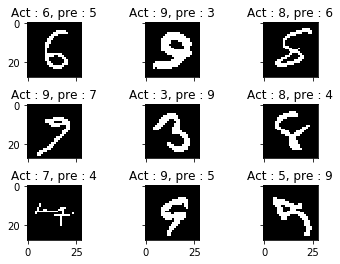

In [8]:
pred_
y_test
dummy_df = X_test.copy()
false_predict=[]
actual_value=[]
index  = []
for i in range(len(pred_)):
    if pred_[i]!=y_test.iloc[i]:
        false_predict.append(pred_[i])
        actual_value.append(y_test.iloc[i])
        index.append(i)
output=[]
for i,v in enumerate(zip(actual_value,false_predict,index)):
    if i <= 9:
        output.append(v)
    else:
        break
print(output)        
#plotting--- 
def plot_matrix(dataFarame,nine_array):
    incrementor = 0
    fig, ax= plt.subplots(3,3,sharex=True,sharey=True)
    fig.subplots_adjust(hspace=.5)
    for ind,(a,b,c) in enumerate(nine_array):
        row =  dataFarame.iloc[c]
        val=[]
        for i in row:
            if i > 0:
                value = round(i/256)
                val.append(value)
            else:
                val.append(i)
        val = np.array(val).reshape(28,28)
        plt.gray()
        if ind >= 1:
            column = ind%3
            if column == 0:
                incrementor= incrementor + 1
                if incrementor == 3:
                    break                    
            ax[incrementor,column].imshow(val)
            ax[incrementor,column].set_title('Act : {actual}, pre : {predicted}'.format(actual=a,predicted=b))    
        else:
            ax[0,0].imshow(val)
            ax[0,0].set_title('Act : {actual}, pre : {predicted}'.format(actual=a,predicted=b))    
plot_matrix(dummy_df,output)
